# 위치 통계량

통계량의 필요성 : 간단하게 확률분포 확인 
- 통계량 : 확률 분포의 특성을 나타내는 지표 의미
- 통계량 계산하는 기술통계(=기초통계) 바탕 -> 확률분포 간단하게 확인 가능 
- 변수가 많을 경우 훨씬 효율적 

통계량 종류 
- 대표 통계량 : 데이터의 중심 / 집중 경향 나타냄 (ex. 평균, 최빈값 등)
- 산포 통계량 : 데이터의 퍼진 정도 나타냄 (ex. 분산, 범위, 표준편차)
- 분포 통계량 : 데이터의 위치 정보 / 모양 나타냄 (ex. 왜도, 첨도, 사분위수, 최댓값, 최솟값)

--- 

## 기술통계량 
데이터의 특징 요약, 기술하는 통계량 

- 위치통계량(measure of location)
    - 데이터의 중심, 위치를 나타내는 척도(대표값)
    - 평균, 중위수, 절사평균, 최빈수, 사분위수 등 
- 변이통계량(measure of dispersion)
    - 데이터의 퍼짐, 흩어진 정도를 나타내는 척도(산포도)
    - 표준편차, 분산, 사분위간 범위 등 
- 모양 통계량(measure of shape)
    - 왜도 : 중심위치로 부터 어느 한쪽으로 치우친 정도를 나타내는 척도 
    - 첨도 : 분포의 뾰족한 정도

### 1. 위치통계량(중심경향성)

#### 평균(mean)
가장 많이 사용되는 대표값 
- 산술평균 : 모든 데이터의 합 / 데이터의 개수
    - 계산이 쉽고 수학적으로 활용하기 편리하며, 각 자료에 대해 유일한 값을 가짐 
    - 분산의 계산, 모수 추정, 가설 검정 등 통계분석의 대표적인 통계량으로 널리 사용됨 
    - 극단치가 있는 경우 평균이 왜곡될 수 있음 -> 이경우에는 대표값으로 중앙값을 사용 
- 모평균 : 값을 구하기 위한 모든 데이터들의 평균 
- 표준평균 :  모든 값을 구할 수 없기 때문에 신뢰도가 훼손되지 않는 선에서 값들을 추출하여 구한 평균 

#### 산술평균

In [1]:
 

import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt

x = [1,2,3,4,5]
print(np.mean(x))
print(np.array(x).mean())
print(pd.Series(x).mean())

print()

# 이진변수에 대한 평균  - 이진변수에 대한 산술평균 : 1의 비율과 같음 
 
x1 = [1,0,0,0,1]
print(np.mean(x1))
print(np.array(x1).mean())
print(pd.Series(x1).mean())


3.0
3.0
3.0

0.4
0.4
0.4


In [2]:
df = pd.read_csv('c:\my_python\data\ch2_scores_em.csv', index_col = 'student number')
print(df.head())
print(df.shape)

                english  mathematics
student number                      
1                    42           65
2                    69           80
3                    56           63
4                    41           63
5                    57           76
(50, 2)


In [3]:
# 10개 영어점수만 추출 후 저장 

scores = np.array(df['english'])[:10]
scores # <class 'numpy.ndarray'>

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [4]:
scores_df = pd.DataFrame({'scores':scores}, 
                          index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                          name='student'))
scores_df


,scores
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [5]:
# 산술평균
# scores : numpy 배열
# scores_df : pandas 데이터프레임
print(sum(scores)/len(scores))
print(np.mean(scores)) # 넘파이 평균 구하기
print(scores.mean()) # 넘파이 평균 구하기
print(scores_df.mean()) # 판다스 평균 구하기 
print()
#비교해보기 
x = [1,2,3,4,5]
print(np.mean(x))
print(np.array(x).mean())
print(pd.Series(x).mean())


55.0
55.0
55.0
scores    55.0
dtype: float64

3.0
3.0
3.0


#### 기하평균 
- n개의 양수 값을 모두 곱한것의 n제곱근 
- 성장률 평균 

- 아래 year데이터는 어느 회사의 매출 증가율을 수집해높은 데이터이다. 
- 1차년도에 200%, 2차년도에 800%, 3차년도에 300% 성장을 했다면 연평균 성장률은 어떻게 되는가?

In [6]:
year = [2,8,3]

#산술평균
print(np.mean(year)) # 4.333333333333333

# 매년 430% 성장으로 나타남 - 1차년도에 430퍼 2차년도 430퍼, 3차년도 430퍼 라면 전년대비 성장이므로
# 이 회사는 3개년동안 430*430*430 성장한게 되므로 총 79507000 성장한상황이 됨  

# 실제 성장은 200*800*300 이므로 차이가 많다. 

# 이렇게 곱하기를 해서 나오는 값에 대한 평균은 산술평균을 사용하면 의미가 달라짐 

# -> 기하평균을 사용해야함 


4.333333333333333


In [7]:
# 집합자료형을 인수로 받아 모든 원소를 곱한 결과를 반환하는 함수

def multiply(arr) :
    ans = 1
    for n in arr :
        if n == 0 :
            return 0
        ans *= n 
    return ans 

In [8]:
# 기하평균 
multiply(year) ** (1/len(year)) # 3.634241185664279

# 연평균 약 363% 증가함을 알 수 있음 
3.634*3.634*3.634 # 47.99044410399999

47.99044410399999

#### 조화평균
- mmean()함수 사용
- 비율 및 변화율에 대한 평균을 계산할 때 사용 
- 주어진 수들의 -> 역수들의 -> 산술평균에서 -> 역수를 취한 값 

------------------------------------

### 2. 변이통계량 

데이터가 얼마나 퍼져있는지를 나타냄 (= 산포도)
- 하나의 수치로 데이터가 흩어진 저도를 계산 
- 대표값(평균, 중앙값, 최빈수 등)과 더불어 데이터를 비교하는 경우에 유용하게 사용
    > ex) 평균이 같은 A와 B반의 성적 : 두 집단이 동일한 집단일까? (데이터 비교)\
      ex2) 어느 대학에서 같은 과목을 두 교수가 가르친다 하자.\
           두 교수 모두 평균 C학점을 학생들에게 준다면, 어떤 교수를 선택해도 마찬가지인 상황\
           하지만 한 교수는 대부분의 학생들이 평범해서 C를 줬고,\
           다른 교수는 반은 우수하여 A를 주고 반은 공부를 안 다 생각하여 -D를 준것이다. 
           따라서, 흩어짐의 정도(산포도)를 생각하지 않고 평균 성적만 고려하여 교수를 선택하면 학점을 받는데 어려움을 겪을 수 있다. 


범위(range)
- 데이터의 최대값과 최소값의 차이 
- 데이터가 퍼져 있는 정도를 나타내는 가장 **간단한** 방법 
- 범위가 클 수록 산포가 크다고 말할 수 있지만, 평균과 마찬가지로 극단값에 영향을 받음 
- 데이터 중 2개의 정보 (최댓값, 최솟값)만을 이용 -> 적절한 척도로 사용하기 어려움 
- R = max - min

중간 범위(중앙값과 다름!!)
- 최댓값과 최솟값의 평균 

사분위간 범위(interquartile range : IQR)
- 데이터를 크기순으로 나열 -> 4등분 -> Q3(75%) - Q1(25%)

사분위수 편차(quartile deviation) -> 이미지, 동영상에서 음파를 분리한 파형 편차를 구할 때 사용 
- 범위의 문제점을 보완한 척도 
- 사분위간 범위의 값을 2로 나눈 값 (= 사분위범위의 평균값)

분산 (variance)
- 산포도의 척도로 가장 널리 사용되는 방법 
- 데이터가 퍼져있는 정도의 기준으로 평균을 사용 (기준=평균)
- 계산법 : 각 데이터와 평균과의 차이를 제곱하여 합한 값의 평균 (양수와 음수가 함께 있으면 상쇄가 발생 -> 제곱하는 이유)
    - 데이터 = 모집단 전체 -> 데이터의 개수(n개)로 나누어줌 
    - 데이터 = 표본일 경우 -> (n-1)로 나누어줌
        - 표본의 경우 n으로 나누어 주는것 보다 n-1로 나누어주는것이 더 좋은 척도가 됨
        - 표본의 크기가 클 경우엔 별 차이 없음 

        

In [9]:
# 분산 계산 - var() 사용

import numpy as np
import pandas as pd

x = [1,2,3,4,5]
print(np.var(x, ddof = 1)) # ddof : 1 = 자유도가 표본 / 0 = 자유도가 모집단 # 여기서는 분모가 n-1
print(np.array(x).var()) # ddof = 0 : 자유도가 모집단 (분모 =n)
print(pd.Series(x).var(ddof=0)) # ddof = 0 : 자유도가 모집단 (분모 =n)

# 값의 스케일에 크게 영향을 받기 때문에 
# 변수를 스케일링한 후 -> 분산, 표준편차를 구하는게 좋음 

2.5
2.0
2.0


표준편차(standard deviation)
- 계산된 분산의 제곱근으로 계산 
- 평균을 중심으로 일정한 거리에 포함된 데이터의 비율이 얼마인가를 계산 
- **모든 데이터를** 고려한 척도
- 특징 
    - 모든 데이터가 동일한 값을 갖는다면 분산과 표준편차 = 0
    - 모든 데이터에 동일한 값을 더해주거나 빼도 변하지 않음 
    - 모든 데이터에 동일한 값(c)을 곱하면 분산은 분산x𝐶^2으로 표준편차는 표준편차×𝐶 만큼 커짐
- 분산에서 제곱의 영향을 없앤 지표
- 분산과 표준편차가 크면 클수록 산포가 크다 

In [10]:
# 표준편차 계산 : std()

x = [1,2,3,4,5]
print(np.std(x, ddof = 1))
print(np.std(x, ddof = 0))
print(np.array(x).std(ddof=1))
print(pd.Series(x).std())


1.5811388300841898
1.4142135623730951
1.5811388300841898
1.5811388300841898


변동계수 (CV : Coefficient of variable)
- 표본 표준편차를 표본평균으로 나눈 값 또는 그 값에 100을 곱한 값 
- 상대 표준편차
- **서로 다른 평균과 표준편차를 갖는 여러 데이터의 흩어진 정도를 비교** 할 때 시용
- 변동계수 값이 크다는 것은 데이터의 흩어진 정도가 상대적으로 크다는 의미 

변동계수의 필요성
- 변수 스케일링 한 후 표준편차를 구함(데이터가 모두 양수인 경우 변동계수 사용)

In [11]:
from scipy.stats import *
x1 = np.array([1,2,3,4,5])
x2 = x1 * 10
print(np.std(x1, ddof=1)) # 표준편찾
print(np.std(x2, ddof=1))

# 변동계수는 동일 !!
print(variation(x1, ddof = 0)) 
print(variation(x2)) # 자유도 = 0

# 변동 계수 수식
print(np.std(x1, ddof=1)/np.mean(x1))
print(np.std(x2, ddof=1)/np.mean(x2))

1.5811388300841898
15.811388300841896
0.47140452079103173
0.4714045207910317
0.5270462766947299
0.5270462766947299


### 3. 스케일링(표준화)
- 평균 : 0, 표준편차 : 1 이됨
- 각 값들을 상대적인 값으로 변화시키는 기법 
- 평균이 95점(국어), 평균이 30(수학) 일 때, 
    - 국어-90, 수학-80이라면 어떤 과목을 더 잘 하는건가?
- 표준화된 데이터는 점수 같은 단위를 사용하지 않는다.

In [12]:
print(x1)
print(x2)

# standard scaling - 평균이 0, 표준편차가 1이됨 
# (data - data_set.mean())/data_set.std()

z1 = (x1 - x1.mean())/x1.std()
z2 = (x2-x2.mean())/x2.std()

print(z1)
print(z2) # 보통 -3에서 +3까지 분포됨

print(z1.mean())
print(z1.std())

[1 2 3 4 5]
[10 20 30 40 50]
[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
0.0
0.9999999999999999


#### 표준화 예제 

In [13]:
df = pd.read_csv('c:/my_python/data/ch2_scores_em.csv',
                 index_col = 'student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [26]:
scores = df.loc[1:10]
scores.index = ['A','B','C','D','E','F','G','H','I','J']
scores.index.name = 'students'
print(scores.mean())
print(scores.std())
scores

english        55.0
mathematics    71.4
dtype: float64
english        9.775252
mathematics    8.720347
dtype: float64


,english,mathematics
students,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [30]:
# 표준화
z_scores = (scores-scores.mean())/scores.std()
print(z_scores)
print(z_scores.mean()) # 거의 0이라고 봄 
print(z_scores.std())

           english  mathematics
students                       
A        -1.329889    -0.733916
B         1.432188     0.986199
C         0.102299    -0.963264
D        -1.432188    -0.963264
E         0.204598     0.527502
F        -0.716094    -1.307287
G         1.022992     1.100874
H        -0.613795    -0.619241
I         1.022992     0.756851
J         0.306897     1.215548
english        2.775558e-17
mathematics   -6.883383e-16
dtype: float64
english        1.0
mathematics    1.0
dtype: float64


#### sklearn을 이용한 스케일링 - 머신러닝을 위해 쓰는 경우가 대부분
- df의 각 **열**에 대해서 스케일링 하는데 적합 
     - 따로 따로 구해줄 필요 없음 

In [45]:
import numpy as np
import pandas as pd

X = pd.DataFrame({'X1' : [1,2,3,4,5],
                  'X2' : [10, 20, 30, 40, 50]})
X

,X1,X2
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [52]:
# 표준화
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() # 인스턴스 생성 
Z = scaler.fit_transform(X) # 표준화 진행 후 array 반환 !!! 중요!!!!!!!!
print(Z)
print(type(Z))
print(Z.mean())
print(Z.std()) # 표준편차가 같기 때문에 스케일링 결과가 같은 값으로 나오게 된다. 



[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]
<class 'numpy.ndarray'>
0.0
0.9999999999999999


In [53]:
# 그래서 필요하다면 DF로 다시 변환 해줘야함 !!!
pd.DataFrame(Z)




,0,1
0,-1.414214,-1.414214
1,-0.707107,-0.707107
2,0.000000,0.000000
3,0.707107,0.707107
4,1.414214,1.414214


#### MinMaxScaling
- 언제나 최솟값과 최댓값이 균일하다면 사용가능
- 그렇지 않다면 사용하지 말것 !
1. 계산식 사용 : (data - data_set.min()) / (data_set.max()-data_set.min())
2. sklearn의 MinMaxScaler 사용 

In [55]:
# 1. 계산식 사용

x1 = np.array([1,2,3,4,5])
x2 = x1 * 10

z1 = (x1-x1.min())/x1.max()-x1.min()
z2 = (x2-x2.min())/x2.max()-x2.min()

print(z1)
print(z2)

[-1.  -0.8 -0.6 -0.4 -0.2]
[-10.   -9.8  -9.6  -9.4  -9.2]


In [63]:
# 2. sklearn의 minmax 사용 

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

print(X) # x1, x2가 칼럼으로 있는 DataFrame
print(type(X))

Z = mm.fit_transform(X) # 인자로 DataFame 사용 
print(Z)
print(type(Z)) # 하지만 넘파이 배열로 출력돼서 나옴 
pd.DataFrame(Z) # 필요시 DataFrame으로 다시 바꿔줘야함 

   X1  X2
0   1  10
1   2  20
2   3  30
3   4  40
4   5  50
<class 'pandas.core.frame.DataFrame'>
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [0.75 0.75]
 [1.   1.  ]]
<class 'numpy.ndarray'>


,0,1
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


#### 편찻값 
- 평균이 50, 표준편차가 10이 되도록 규정한 값 

In [64]:
z = 50 + 10 * (scores - np.mean(scores))/np.std(scores)

result = pd.concat([scores, z], axis = 1)
result.columns = ['영어', '수학', '영어편찻값', '수학편찻값']
result[['영어', '영어편찻값', '수학', '수학편찻값']] # 보고싶은 열 순서대로 추출

c:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,영어,영어편찻값,수학,수학편찻값
students,,,,
A,42,35.981739,65,42.263848
B,69,65.096588,80,60.395454
C,56,51.078328,63,39.846301
D,41,34.903412,63,39.846301
E,57,52.156655,76,55.560359
F,48,42.451706,60,36.219980
G,65,60.783277,81,61.604227
H,49,43.530034,66,43.472622
I,65,60.783277,78,57.977906


In [65]:
print(z.mean())
print(z.std())

english        50.0
mathematics    50.0
dtype: float64
english        10.540926
mathematics    10.540926
dtype: float64


### 4. 도수분포표 
분할된 구간과 데이터의 개수를 표로 나타낸것 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


df = pd.read_csv('c:/my_python/data/ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [3]:
df.shape

(50, 2)

In [5]:
# 50명의 영어점수 np.array로 표현
english_score = np.array(df['english'])

# 다시 Series화 하여 describe 확인 
pd.Series(english_score).describe()


count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

영어점수 도수 분포표 생성
- 각 빈도는 histogram()을 통해 얻어옴
- numpy.histogram(a,\
　　　　　　　　　bins= 10,\
　　　　　　　　　range= None,\
　　　　　　　　　density= None)

-  a : 히스토그램 계산 위한 입력데이터
- bins : bins가 정수이면 동일한 간격의 bins 수를 나타냄 
- range : 상한과 하한 범위가 지정되지 않으면 [a.min(), a.max()]가 범위
- density : 부울 매개 변수값이 True이면 빈도를 계산하는 대신 확률을 계산 
- 반환값 : hist와 bin_edges의 두 배열을 반환
    - hist : 히스토그램 값을 표시 
    - bin_edges :  계급 (크기가 항상 1 + hist크기 즉, length(hist) + 1)

In [13]:
freq, e = np.histogram(english_score, bins = 10, range = (1,100))
print('freq :', freq)
print('e :', e)

# 0~10, 10~20, ... , 90~100 이라는 문자열 리스트 생성   
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]

# freq_class를 인덱스로 DataFrame 생성 
freq_class_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class,
                                           name='class'))
freq_class_df

freq : [ 0  0  0  2  8 16 20  4  0  0]
e : [  1.   10.9  20.8  30.7  40.6  50.5  60.4  70.3  80.2  90.1 100. ]


,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,20
70~80,4
80~90,0


계급값 
- 각 계급을 대표하는 값 
- 중앙값 사용
- 60 ~ 70의 계급이면 계급값은 65점 

In [19]:
# class_value = [(i+(i+10)) for i in range(0,100,10)]
class_value = [int((i + (i+10))/2) for i in range(0,100,10) ]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

상대도수 
- 전체 데이터에 대해서 해당 계급의 데이터가 어느 정도 비율을 차지하고 있는지를 나타냄 

In [20]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.4 , 0.08, 0.  , 0.  ])

누적 상대도수 
- 해당 계급 까지의 상대도수 합 
- 누적 합 : np.cumsum()

In [21]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.92, 1.  , 1.  , 1.  ])

In [25]:
# 도수 분포표 확장 
freq_class_df['class value'] = class_value
freq_class_df['relative frequency'] = rel_freq
freq_class_df['cumulative relative frequency'] = cum_rel_freq

freq_class_df = freq_class_df[['class value', 'frequency', 'relative frequency', 'cumulative relative frequency']]
freq_class_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,20,0.40,0.92
70~80,75,4,0.08,1.00
80~90,85,0,0.00,1.00


도수분포표의 최빈값 
- 최대 도수가 되는 계급의 계급값 -> 60~70 계급의 도수가 최대 
- pd.DataFrame의 idxmax(), idxmin() 함수 사용
    - pd.DataFrmae().idmax() : 행단위 최대 값의 인덱스 찾아줌 
    - pd.DataFrmae().idmax(axis = 1) : 열단위 최대 값의 인덱스 찾아줌 
    - pd.DataFrmae().idmax(axis = 1, kipna=True) : skipna = 부울매개변수로 널값을 제외시켜줌 (행/열 전체가 null이면 null 출력)
    - 반환 값 : 지정된 축에 따라 최대 값의 인덱스를 포함하는"Series"를 반환 

In [29]:
dataframe=pd.DataFrame({'Attendance': {0: 60, 1: 100, 2: 80,3: 78,4: 95},
                        'Obtained Marks': {0: 90, 1: 75, 2: 82, 3: 64, 4: 45}})
print(dataframe)


# 최댓값
series = dataframe.idxmax()
print('Indexes : \n', series)

#최솟값 
series1 = dataframe.idxmin()
print('Indexes : \n', series1)

   Attendance  Obtained Marks
0          60              90
1         100              75
2          80              82
3          78              64
4          95              45
Indexes : 
 Attendance        1
Obtained Marks    0
dtype: int64
Indexes : 
 Attendance        0
Obtained Marks    4
dtype: int64


그래프화 
- 히스토그램 
    - 수치형 변수의 분포를 확인할 때 주로 사용
    - 2개의 히스토그램을 겹쳐서 비교 가능 
- box plot 
    - 3개 이상의 그룹의 전반적인 분포 비교 할 때 사용
    - 그룹의 개수 상관없이 상자그림을 나란히 그릴 수 있음  

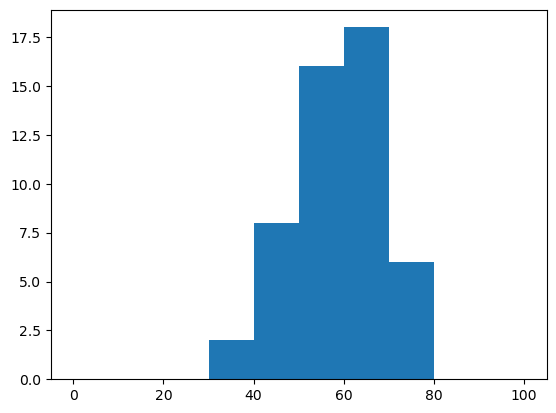

In [30]:
# 영어점수 시각화 - 히스토그램으로 분포 확인 

plt.hist(english_score, bins = 10, range = (0,100));

c:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


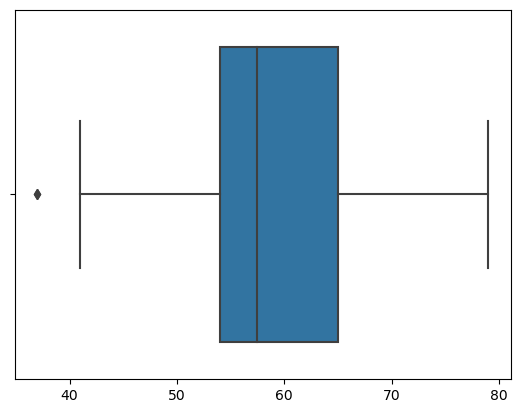

In [31]:
# 사분위수 

import seaborn as sns

sns.boxplot(english_score);

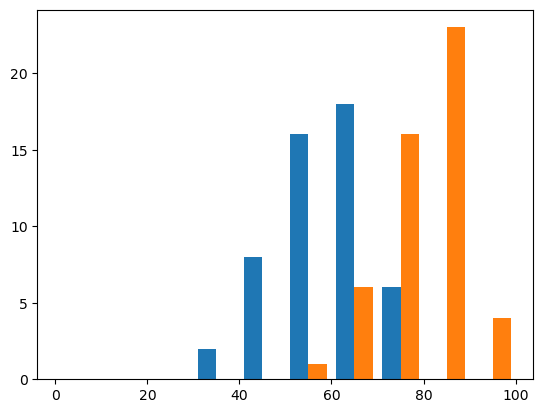

In [37]:
# 두 개의 그래프 겹쳐 비교하기 

plt.hist(df, bins=10, range=(0,100));

<AxesSubplot:ylabel='Frequency'>

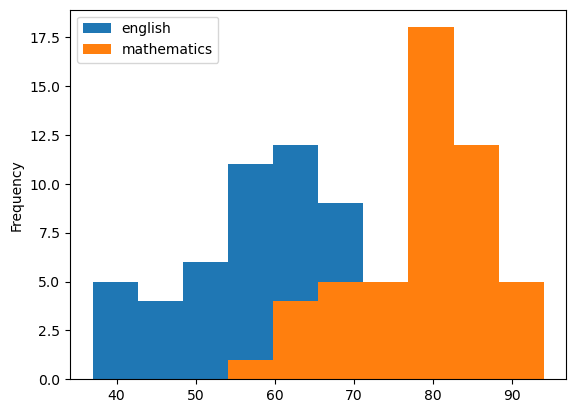

In [35]:
df.plot(kind='hist')

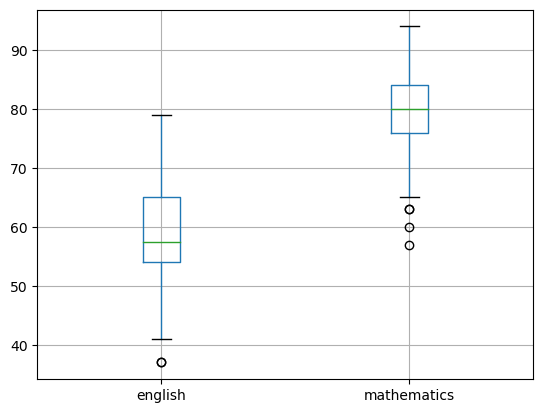

In [38]:
df.boxplot();

### 5. 모양 통계량 
1. 왜도(skewness)
- 데이터의 비대칭도 
- 분포 모양이 대표값(ex. 평균)을 중심으로 좌우의 모양이 대칭적인가 아닌가를 측정 
- 데이터가 한쪽으로 얼마나 치우쳐져 있는가를 나타냄 
- 특징 
    - 왜도가 0에 가까운 값을 가지면 분포의 모양은 "좌우대칭"
    - 왜도가 음수를 나타내면 왼쪽 긴꼬리 분포 
- 계산 
    - 분포의 비대칭도
    - 왜도가 0이면 정규분포 
    - 왜도의 절대값이 1.5 이상이면 많이 치우쳤다고 봄 

In [45]:
x1 = [1] * 30 + [2] * 20 + [3] * 20 + [4] * 15 + [5] * 15 # 좌측으로 치우침
x2 = [1] * 15 + [2] * 20 + [3] * 30 + [4] * 20 + [5] * 15 # 치우치지 않음
x3 = [1] * 15 + [2] * 15 + [3] * 20 + [4] * 20 + [5] * 30 # 우측으로 치우침

In [50]:
print(pd.Series(x1).value_counts(sort=False))
print(pd.Series(x2).value_counts(sort=False))
print(pd.Series(x3).value_counts(sort=False))

1    30
2    20
3    20
4    15
5    15
dtype: int64
3    30
2    20
4    20
1    15
5    15
dtype: int64
5    30
3    20
4    20
1    15
2    15
dtype: int64


AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


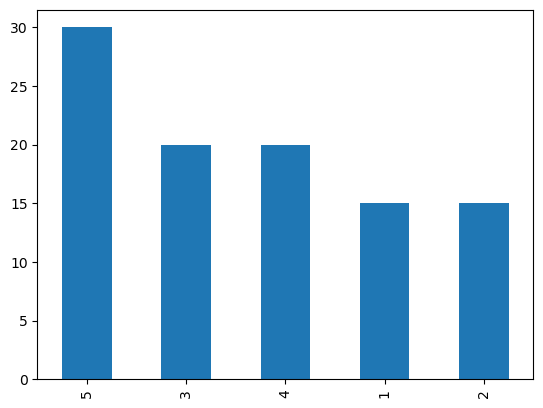

In [52]:
print(pd.Series(x1).value_counts().plot(kind='bar'))
print(pd.Series(x2).value_counts().plot(kind='bar'))
print(pd.Series(x3).value_counts().plot(kind='bar'))

In [64]:
from scipy.stats import *
print('오른쪽 긴꼬리 왜도:', skew(x1))
print('치우침이 없는 왜도:', skew(x2))
print('왼쪽 긴꼬리 왜도:', skew(x3))

오른쪽 긴꼬리 왜도: 0.3192801008486361
치우침이 없는 왜도: 0.0
왼쪽 긴꼬리 왜도: -0.31928010084863606


2. 첨도(kurtosis)
- 데이터의 뾰족한 정도
- 분포가 대푯값을 중심으로 얼마나 모여있는가 나타내는 척도
- 정규분포(첨도=3)를 기준으로 비교 
    - 데이터가 대푯값을 중심으로 많이 몰려있으면 뾰족한 모양 (첨도>3)
    - 데이터가 대푯값을 중심으로 좌우로 퍼져있으면 경사가 완만 (첨도<3>)

In [65]:
x1 = [1] * 20 + [2] * 20 + [3] * 20 + [4] * 20 + [5] * 20 # 전혀 뾰족하지 않음
x2 = [1] * 10 + [2] * 20 + [3] * 40 + [4] * 20 + [5] * 10 # 조금 뾰족
x3 = [1] * 5 + [2] * 15 + [3] * 60 + [4] * 15 + [5] * 5 # 매우 뾰족

<AxesSubplot:>

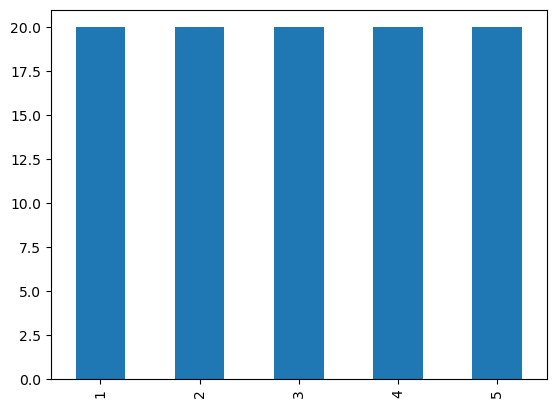

In [66]:
pd.Series(x1).value_counts(sort=False).plot(kind='bar') # 젼혀 뾰족하지 않음 

<AxesSubplot:>

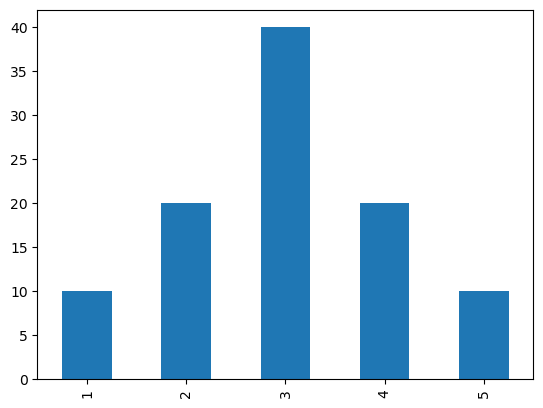

In [67]:
pd.Series(x2).value_counts(sort=False).plot(kind='bar') # 조금 뾰족함 

<AxesSubplot:>

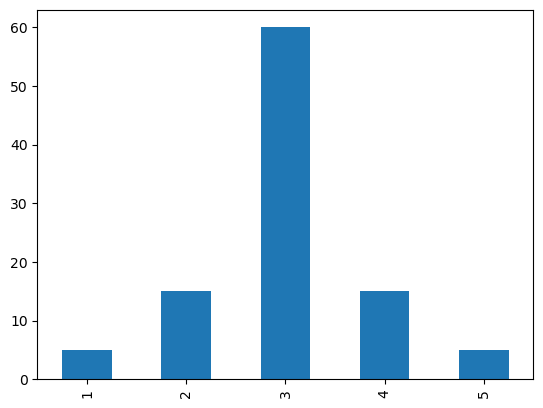

In [69]:
pd.Series(x3).value_counts(sort=False).plot(kind='bar') # 매우 뾰족함 

In [70]:
print('x1첨도:', kurtosis(x1))
print('x2첨도:', kurtosis(x2))
print('x3첨도:', kurtosis(x3))

x1첨도: -1.3
x2첨도: -0.5
x3첨도: 0.8775510204081636
